Thinkful Bootcamp Course

Author: Ian Heaton

Email: iheaton@gmail.com

Mentor: Nemanja Radojkovic

Date: 2017/03/02


In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import stats_toolbox as st

sb.set_style('darkgrid')

# Unit 1 Cap Stone :  Improving Allegiant Air Ridership

Wynn Las Vegas and Allegiant Air have teamed up to try get people from the US Midwest to visit Las Vegas and stay at Wynn properties.  Allegiant Air would like to try a new advertising technique aimed at the mid-west to increase rider ship to Las Vegas.  

In [54]:
# Read in each of the three files, data for 2014, 2015 and 2016
File_2014 = '/media/ianh/space/ThinkfulData/AirCarrierStatisticsUSOnly/2014_943167592_T_T100D_MARKET_US_CARRIER_ONLY.csv'
FlightData_2014 = pd.read_csv(File_2014)
# Unnecessary column removed from data frame 
del FlightData_2014['Unnamed: 13']

# Data for 2015 flights
File_2015 = '/media/ianh/space/ThinkfulData/AirCarrierStatisticsUSOnly/2015_943133173_T_T100D_MARKET_US_CARRIER_ONLY.csv'
FlightData_2015 = pd.read_csv(File_2015)
# Unnecessary column removed from data frame 
del FlightData_2015['Unnamed: 13']

# Data for 2016 flights
File_2016 = '/media/ianh/space/ThinkfulData/AirCarrierStatisticsUSOnly/2016_943125905_T_T100D_MARKET_US_CARRIER_ONLY.csv'
FlightData_2016 = pd.read_csv(File_2016)
# Unnecessary column removed from data frame 
del FlightData_2016['Unnamed: 11']

In [93]:
Las_Vegas_Air_2014 = FlightData_2014.query('DEST_CITY_NAME == "Las Vegas, NV"').query('UNIQUE_CARRIER_NAME == "Allegiant Air"')
Las_Vegas_Air_2015 = FlightData_2015.query('DEST_CITY_NAME == "Las Vegas, NV"').query('UNIQUE_CARRIER_NAME == "Allegiant Air"')
Las_Vegas_Air_2016 = FlightData_2016.query('DEST_CITY_NAME == "Las Vegas, NV"').query('UNIQUE_CARRIER_NAME == "Allegiant Air"')

In [94]:
print("Number of Flights to Las Vegas per Month for Allegiant Air\n")
print("\t %15s %5s %5s\n" % ('2014', '2015', '2016'))
for i in range(1,13):
    print('\tMonth %2d  : %3d %5d %5d' %(i, len(Las_Vegas_Air_2014.query('MONTH == @i')), \
                                        len(Las_Vegas_Air_2015.query('MONTH == @i')), \
                                        len(Las_Vegas_Air_2016.query('MONTH == @i'))))


Number of Flights to Las Vegas per Month for Allegiant Air

	            2014  2015  2016

	Month  1  :  45    46    54
	Month  2  :  46    46    52
	Month  3  :  47    46    52
	Month  4  :  44    49    52
	Month  5  :  45    48    55
	Month  6  :  44    49    54
	Month  7  :  44    50    54
	Month  8  :  45    48    54
	Month  9  :  45    49    55
	Month 10  :  47    52    59
	Month 11  :  46    55    60
	Month 12  :  46    53     0


Springfield, MO : 1209
 Des Moines, IA : 1216


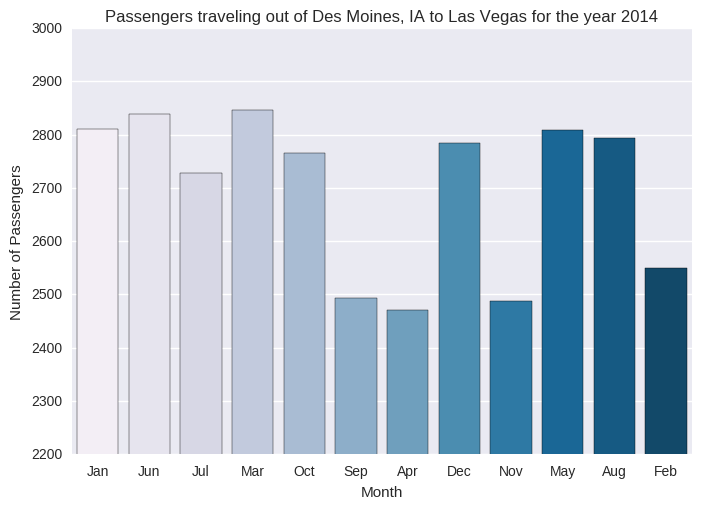

In [90]:
#create a dictionary for the months
month_numToName = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
origincity_monthly_passgrs = {}

for row in Las_Vegas_Air_2014.itertuples(index=True, name='Pandas'):
    city   = getattr(row, "ORIGIN_CITY_NAME")
    mth    = getattr(row, "MONTH")
    psngrs = getattr(row, "PASSENGERS")
    month  = month_numToName.get(mth)
    if city in origincity_monthly_passgrs:
        inner = origincity_monthly_passgrs.get(city)
        if month in inner:
            number_of_pass = inner.get(month)
            number_of_pass += psngrs
            inner[month] = number_of_pass
        else:
            inner[month] = psngrs
    else:
        origincity_monthly_passgrs[city] = {month:psngrs}
        if city == 'Des Moines, IA' or city == 'Springfield, MO':
            distance = getattr(row, "DISTANCE")
            print('%15s : %4d' % (city, distance))

ia_data = pd.DataFrame.from_dict(origincity_monthly_passgrs.get("Des Moines, IA"), orient='index')
ia_data.columns = ['PASSENGERS']
ia_data['MONTH'] = ['Jan', 'Jun', 'Jul', 'Mar', 'Oct', 'Sep', 'Apr', 'Dec', 'Nov', 'May', 'Aug', 'Feb']


ax = sb.barplot(x="MONTH",y="PASSENGERS", data=ia_data, palette="PuBu")
ax.set(xlabel='Month', ylabel='Number of Passengers')
sb.plt.title('Passengers traveling out of Des Moines, IA to Las Vegas for the year 2014')
sb.plt.ylim(2200, 3000)
plt.show()

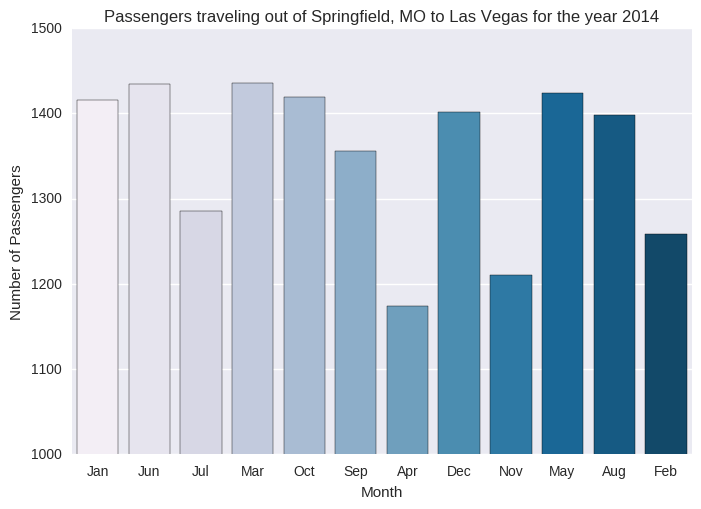

In [91]:
# Springfield, MO Flight data for 2014
mo_data = pd.DataFrame.from_dict(origincity_monthly_passgrs.get("Springfield, MO"), orient='index')
mo_data.columns = ['PASSENGERS']
mo_data['MONTH'] = ['Jan', 'Jun', 'Jul', 'Mar', 'Oct', 'Sep', 'Apr', 'Dec', 'Nov', 'May', 'Aug', 'Feb']


ax = sb.barplot(x="MONTH",y="PASSENGERS", data=mo_data, palette="PuBu")
ax.set(xlabel='Month', ylabel='Number of Passengers')
sb.plt.title('Passengers traveling out of Springfield, MO to Las Vegas for the year 2014')
sb.plt.ylim(1000, 1500)
plt.show()

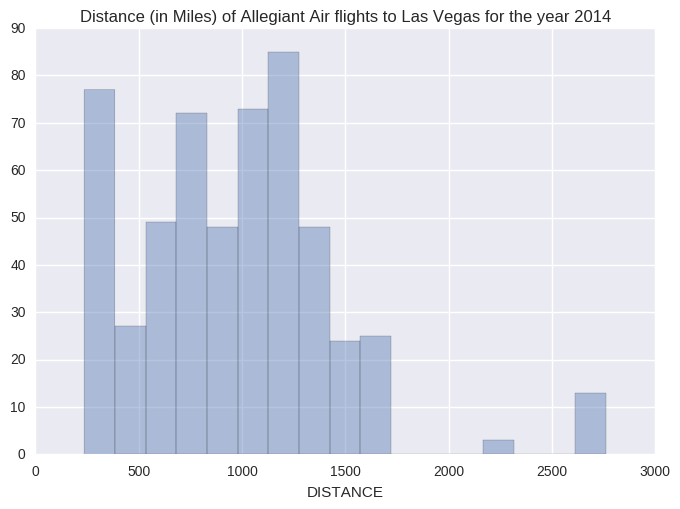

In [92]:
sb.distplot(Las_Vegas_Air_2014.DISTANCE, kde=False, rug=False);
sb.plt.title('Distance (in Miles) of Allegiant Air flights to Las Vegas for the year 2014')
plt.show()

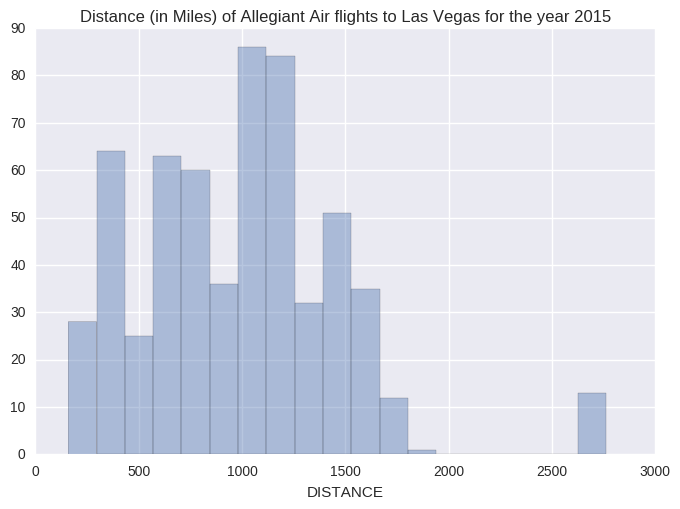

In [11]:
sb.distplot(Las_Vegas_Air_2015.DISTANCE, kde=False, rug=False);
sb.plt.title('Distance (in Miles) of Allegiant Air flights to Las Vegas for the year 2015')
plt.show()

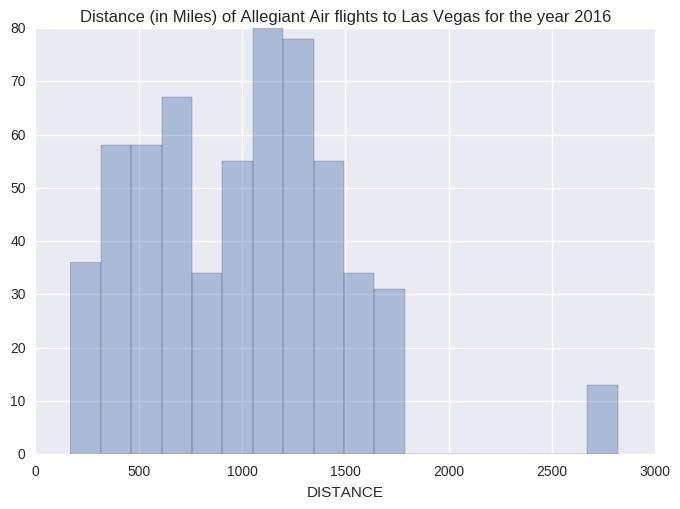

In [12]:
sb.distplot(Las_Vegas_Air_2016.DISTANCE, kde=False, rug=False);
sb.plt.title('Distance (in Miles) of Allegiant Air flights to Las Vegas for the year 2016')
plt.show()